### Compare results of different experiments

In [21]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [23]:
nums = get_dir_nums(log_dir='../dbin/')
print(nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]


In [24]:
ret = get_tbls('basicexp', nums, log_dir='../dbin/')

d_metrics, d_resid, d_params = ret

In [25]:
d_params.T

,basicexp-0,basicexp-1,basicexp-2,basicexp-3,basicexp-4,basicexp-5,basicexp-6,basicexp-7,basicexp-8,basicexp-9,...,basicexp-56,basicexp-57,basicexp-58,basicexp-59,basicexp-60,basicexp-61,basicexp-62,basicexp-63,basicexp-64,basicexp-65
_train_name,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,...,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops
_test_name,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,...,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy
_train_path,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,...,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1
_test_path,../../../other-chess-data/regulation-test-all-2,../../../other-chess-data/regulation-test-all-2,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,...,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy
_model_arch,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet18,resnet18,...,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50
_fit_one_cycle_epochs,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
_fine_tune_epochs,15,15,15,15,15,15,15,15,15,15,...,20,20,20,20,25,25,25,25,25,25
_train_seed,99,22,0,1,2,0,1,2,0,1,...,2,0,1,2,3,4,5,3,4,5
_valid_pct,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
_mult,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Look at Top Models on Easy-Test

In [6]:
tmp  = d_metrics.join(d_params[['_test_path']], 
                      on='exp_name', 
                      how='left',)

In [7]:
test_accs2 = tmp.groupby([ '_test_path','exp_name',]).agg(
                                ['max'])['test_accuracy']

In [8]:
test_accs2.sort_values(by='max', ascending=False).head(15)

max
_test_path                                       exp_name             
../../../other-chess-data/regulation-test-2-easy basicexp-55  0.975309
                                                 basicexp-62  0.969136
                                                 basicexp-61  0.969136
                                                 basicexp-58  0.962963
                                                 basicexp-50  0.944444
                                                 basicexp-16  0.938272
                                                 basicexp-11  0.932099
                                                 basicexp-48  0.932099
                                                 basicexp-60  0.932099
                                                 basicexp-49  0.925926
                                                 basicexp-56  0.925926
                                                 basicexp-57  0.919753
                                                 basicexp-54  0.919753
                                                 basicexp-59  0.919753
                                                 basicexp-52  0.913580

In [9]:
d_params[d_params['model_fn'] =='basicexp-55'].T

,basicexp-55
_train_name,rf-v1-crops
_test_name,test-regulation-2-easy
_train_path,../../../rf-chess-data/cropped_v1
_test_path,../../../other-chess-data/regulation-test-2-easy
_model_arch,resnet50
_fit_one_cycle_epochs,10
_fine_tune_epochs,20
_train_seed,1
_valid_pct,0.2
_mult,1


In [10]:
test_accs2 = tmp.groupby([ '_test_path','exp_name',]).agg(
                                ['min'])['test_loss']

In [11]:
test_accs2.sort_values(by='min', ascending=True).head(15)

min
_test_path                                       exp_name             
../../../other-chess-data/regulation-test-2-easy basicexp-55  0.109551
                                                 basicexp-61  0.109807
                                                 basicexp-62  0.128122
                                                 basicexp-50  0.175138
                                                 basicexp-54  0.189254
                                                 basicexp-49  0.190296
                                                 basicexp-58  0.190692
                                                 basicexp-16  0.198047
                                                 basicexp-59  0.205048
                                                 basicexp-11  0.205148
                                                 basicexp-60  0.215048
                                                 basicexp-48  0.216572
                                                 basicexp-56  0.240588
                                                 basicexp-63  0.243356
                                                 basicexp-10  0.247678

In [12]:
d_params[d_params['model_fn'] =='basicexp-61'].T

,basicexp-61
_train_name,rf-v1-crops
_test_name,test-regulation-2-easy
_train_path,../../../rf-chess-data/cropped_v1
_test_path,../../../other-chess-data/regulation-test-2-easy
_model_arch,resnet50
_fit_one_cycle_epochs,10
_fine_tune_epochs,25
_train_seed,4
_valid_pct,0.2
_mult,1


In [13]:
tps = d_params['_test_path'].unique();tps

array(['../../../other-chess-data/regulation-test-all-2',
       '../../../other-chess-data/regulation-test-2-all',
       '../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [14]:
tp_all =  '../../../other-chess-data/regulation-test-2-all'
tp_all =  '../../../other-chess-data/regulation-test-2-easy'
exps = d_params[d_params['_test_path']  == tp_all].index

exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

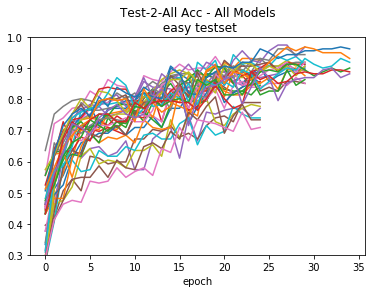

In [15]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

df_agg.T.plot(legend=None, 
              title='Test-2-All Acc - All Models\n easy testset',
              ylim = (.3,1));

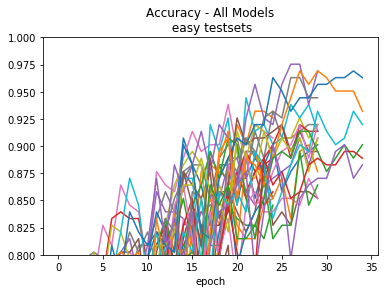

In [16]:
df_agg.T.plot(legend=None, 
              title='Accuracy - All Models\n easy testsets',
              ylim = (.8,1));

In [17]:
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

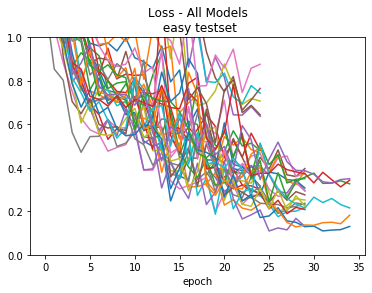

In [18]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_loss')

df_agg.T.plot(legend=None, 
              title='Loss - All Models\n easy testset',
              ylim = (0,1));

In [19]:
tp_all =  '../../../other-chess-data/regulation-test-2-all'
exps = d_params[d_params['_test_path']  == tp_all].index

exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

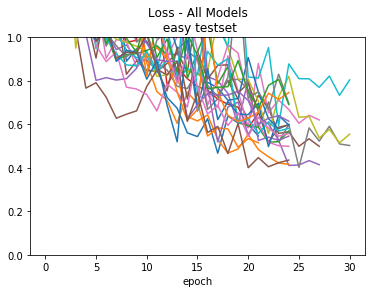

In [20]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_loss')

df_agg.T.plot(legend=None, 
              title='Loss - All Models\n easy testset',
              ylim = (0,1));

##### expbuilder-5: normalize on vs off

In [68]:
cmp_param = '_condition_name'

In [69]:
exps_all = d_params[d_params['_expdesign_name'] == 'rm_norm'].index

In [70]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed        3
model_fn           6
_condition_name    2
_rm_norm           2
dtype: int64

In [71]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [72]:
exp_metrics['exp_name'].unique()

array(['basicexp-54', 'basicexp-55', 'basicexp-56', 'basicexp-57',
       'basicexp-58', 'basicexp-59'], dtype=object)

In [73]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [74]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [75]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

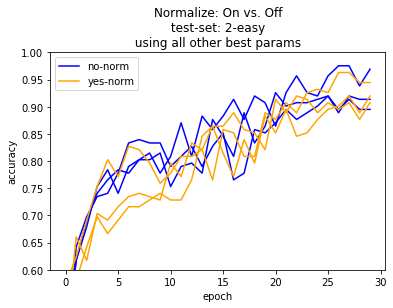

In [76]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Normalize: On vs. Off\n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.6, 1.0]);

In [77]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param
                            ,values='test_loss')

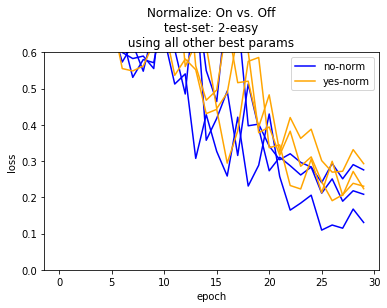

In [79]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Normalize: On vs. Off\n test-set: 2-easy \n using all other best params ')
plt.ylabel('loss')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([0.0, 0.6]);

##### expbuilder-5b: newhorizons
compare this series against all other using that test set

In [113]:
cmp_param = '_expdesign_name'

In [114]:
exps_default = d_params.iloc[5:8,:].index ; exps_default

Index(['basicexp-5', 'basicexp-6', 'basicexp-7'], dtype='object')

In [115]:
tp_easy =  '../../../other-chess-data/regulation-test-2-easy'
exps_all = d_params[d_params['_test_path'] == tp_easy].index

In [116]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [117]:
exp_metrics['exp_name'].unique()

array(['basicexp-8', 'basicexp-9', 'basicexp-10', 'basicexp-11',
       'basicexp-12', 'basicexp-13', 'basicexp-14', 'basicexp-15',
       'basicexp-16', 'basicexp-17', 'basicexp-39', 'basicexp-40',
       'basicexp-41', 'basicexp-42', 'basicexp-43', 'basicexp-44',
       'basicexp-45', 'basicexp-46', 'basicexp-47', 'basicexp-48',
       'basicexp-49', 'basicexp-50', 'basicexp-51', 'basicexp-52',
       'basicexp-53', 'basicexp-54', 'basicexp-55', 'basicexp-56',
       'basicexp-57', 'basicexp-58', 'basicexp-59', 'basicexp-60',
       'basicexp-61', 'basicexp-62', 'basicexp-63', 'basicexp-64',
       'basicexp-65'], dtype=object)

In [118]:
exp_metrics.loc[:,['_expdesign_name']] = (
    exp_metrics['_expdesign_name'].map(
        lambda x:'new_horizons' if x == 'new_horizons' else 'other')
)

In [119]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [120]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

In [121]:
df = exp_metrics.copy()
df = df[['exp_name', cmp_param]]
df = df.drop_duplicates()
df.index = df['exp_name']

In [122]:
colors = ['blue','orange','red','green','magenta','yellow','black',]

unique_vals = df[cmp_param].unique()

color_ind = pd.Series(colors[:len(unique_vals)] ,
                      index=unique_vals)

df = df.merge(color_ind.rename('color'),
         how='left', 
         left_on=cmp_param, 
         right_index=True
        )

df_agg = df_agg.join(df[['color']], on='exp_name', )

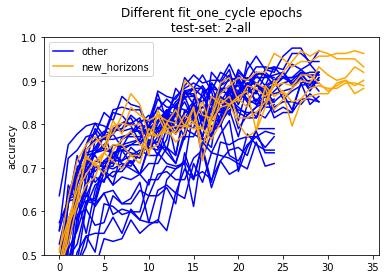

In [123]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=df_agg.T.loc['color'][i])
    
plt.title('Different fit_one_cycle epochs\n test-set: 2-all ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=color) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.5, 1.0]);